# Interpolating FIR filter

In [1]:
import numpy as np
import pylab as plt
from scipy.signal import firwin
from utils import *
%matplotlib inline
np.set_printoptions(precision=4)

In [2]:
PHASE = 5
TAPS = 5

In [3]:
taps = firwin(TAPS*PHASE, 1/(PHASE))
# scaling
taps = taps * PHASE

In [4]:
# test signal
FREQ = 5
N1 = 32
x = np.arange(0, 1, 1/N1)
y = np.sin(x*2*np.pi*FREQ)

In [5]:
# interpolated signal
# zero padding
N2 = N1 * PHASE
x_zero = np.arange(0, 1, 1/N2) - 1/N2*(PHASE-1)
y_zero = np.zeros(N2)
for i in range(N1):
    y_zero[i*PHASE+PHASE-1] = y[i]

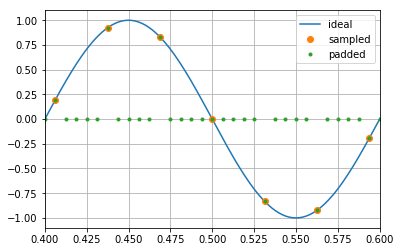

In [6]:
x_ideal = np.arange(0, 1, 1/1000)
y_ideal = np.sin(x_ideal*2*np.pi*FREQ)
plt.plot(x_ideal, y_ideal, label="ideal")
plt.plot(x, y, 'o', label="sampled")
plt.plot(x_zero, y_zero, '.', label="padded")
plt.xlim(0.4, 0.6)
plt.grid()
plt.legend()
plt.show()

In [7]:
# fir filter
y_interpolated = np.zeros(N2)
for i in range(PHASE*TAPS, N2):
    d = y_zero[i-PHASE*TAPS:i]
    v = d * taps
    y_interpolated[i] = np.sum(v)

# delay compensation
fir_delay = PHASE*TAPS//2 + 1
x_interpolated = x_zero - 1/N2*fir_delay

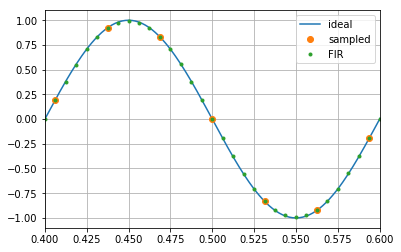

In [8]:
plt.plot(x_ideal, y_ideal, label="ideal")
plt.plot(x, y, 'o', label="sampled")
plt.plot(x_interpolated, y_interpolated, '.', label="FIR")
plt.xlim(0.4, 0.6)
plt.grid()
plt.legend()
plt.show()